In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
import numpy as np
import pandas as pd 

%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#let's check if there is any missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#let's see the description of all column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Zero can't be accepted in the following column
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI

So I am gonna replace zero with NaN  

In [6]:
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [7]:
#total number of NaN entry in each column

print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


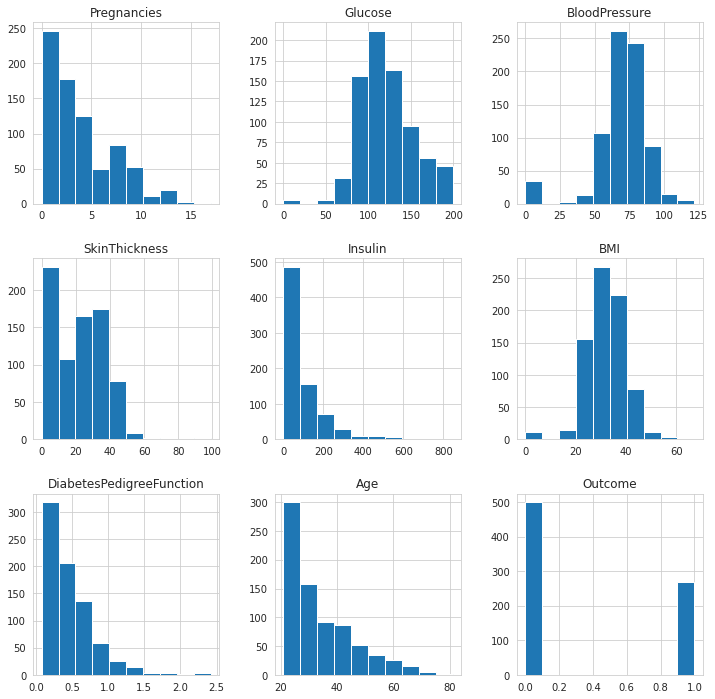

In [8]:
p = df.hist(figsize = (12,12))

In [9]:
df_copy['Glucose'].fillna(df_copy['Glucose'].median(),inplace=True) 
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].median(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(),inplace=True)

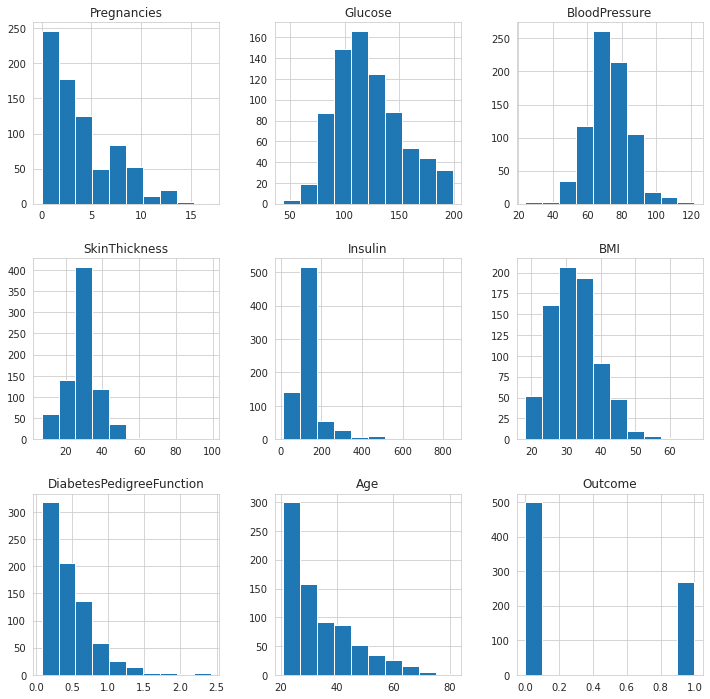

In [10]:
#plotting after removing NaN

p = df_copy.hist(figsize = (12,12))

0    500
1    268
Name: Outcome, dtype: int64


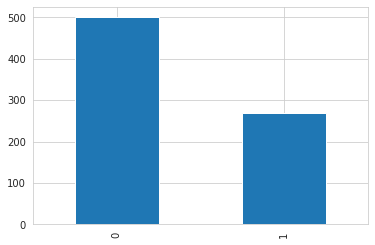

In [11]:
#checking the balance of the data by plotting the distributin of outcome

print(df_copy['Outcome'].value_counts())
p = df_copy['Outcome'].value_counts().plot(kind='bar')

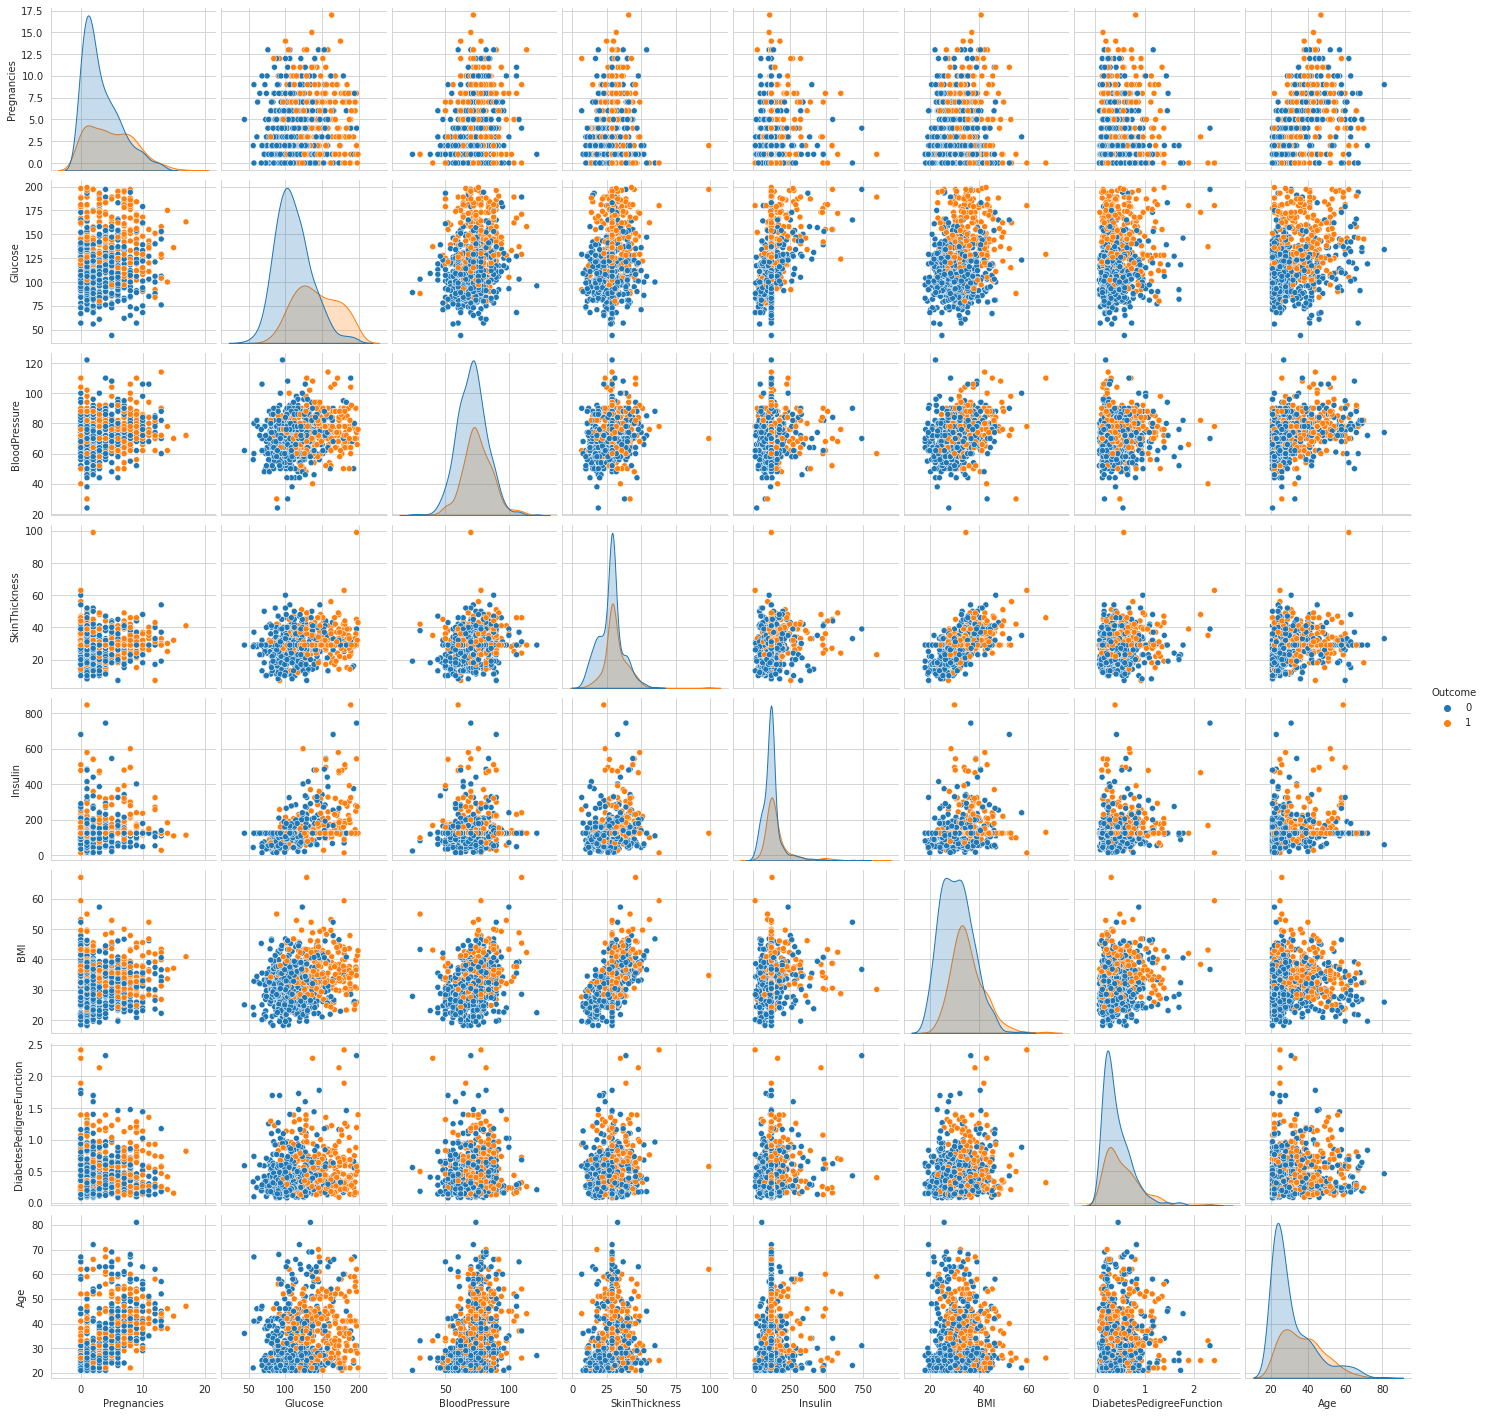

In [12]:
p = sns.pairplot(df_copy, hue='Outcome')

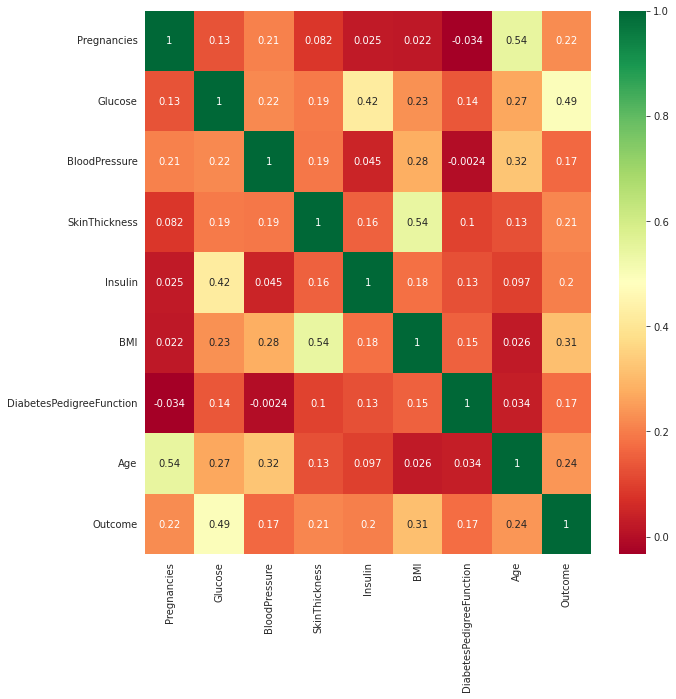

In [13]:
plt.figure(figsize=(10,10))
p = sns.heatmap(df_copy.corr(),annot=True,cmap='RdYlGn')

In [14]:
#now we need to standardize the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df_copy.drop(['Outcome'], axis=1),),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

In [15]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


In [16]:
y=df_copy['Outcome']

In [17]:
#train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=42,stratify=y)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

train_scores=[]
test_scores=[]

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [19]:
max_train_scores = max(train_scores)
train_scores_ind = [i for i,v in enumerate(train_scores) if v==max_train_scores]
print('Max train score {} % and k = {}'.format(max_train_scores*100,list(map(lambda x: x+1, train_scores_ind))))

max_test_scores = max(test_scores)
test_scores_ind = [i for i,v in enumerate(test_scores) if v==max_test_scores]
print('Max test score {} % and k = {}'.format(max_test_scores*100,list(map(lambda x: x+1, test_scores_ind))))

Max train score 100.0 % and k = [1]
Max test score 76.5625 % and k = [11]


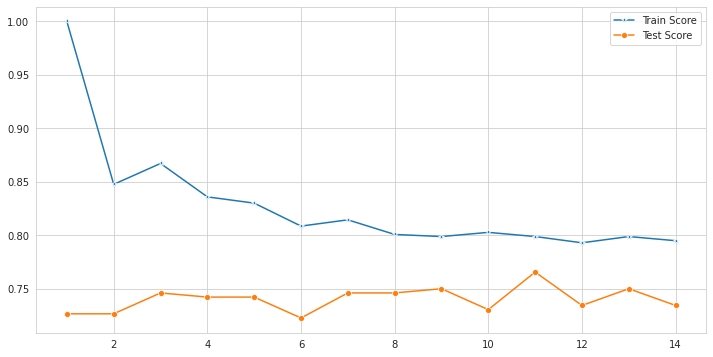

In [20]:
# it's time to visually represent the result

plt.figure(figsize=(12,6))

p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o', label='Test Score')

The least distance is seen for i=11. Hence 11 will be used for final model

In [21]:
knn=KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

In [22]:
from sklearn.metrics import confusion_matrix
y_predict = knn.predict(X_test)
confusion_matrix(y_test,y_predict)

pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,142,25,167
1,35,54,89
All,177,79,256


In [23]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



0.8191482204131064


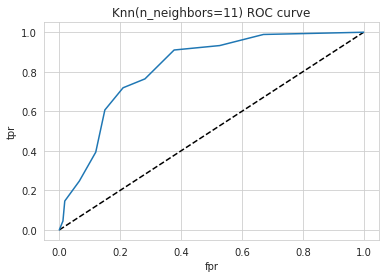

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

print(roc_auc_score(y_test,y_pred_proba))

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()